In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
file_path = '/Users/anapaulavaladez/Desktop/Project 1 Python /Mall_Customers.csv'
data = pd.read_csv(file_path)

In [9]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [11]:
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [12]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

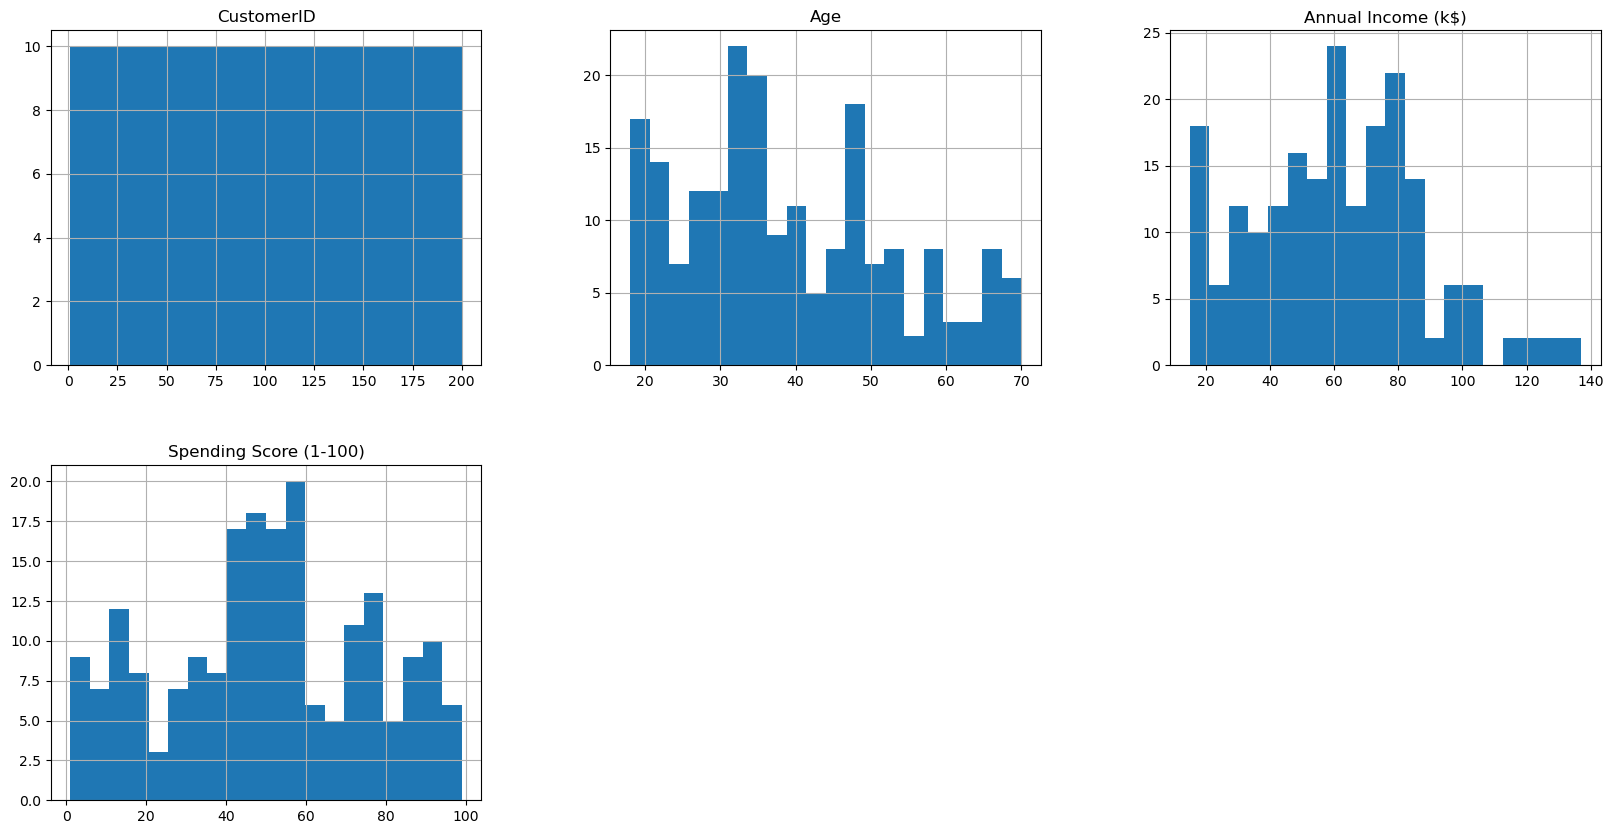

In [13]:
plt.figure(figsize=(10, 6))
data.hist(bins=20, figsize=(20, 10), layout=(2, 3))
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


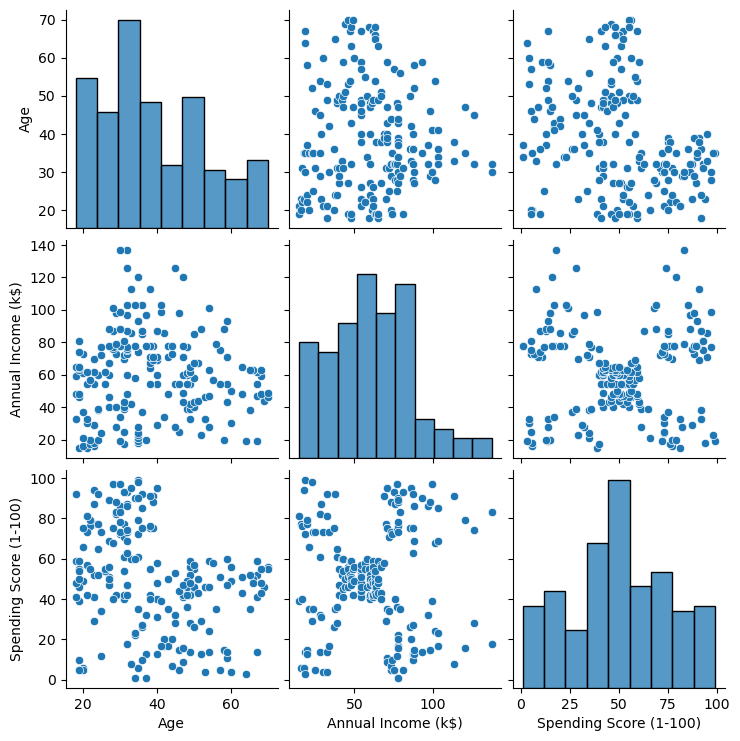

In [14]:
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

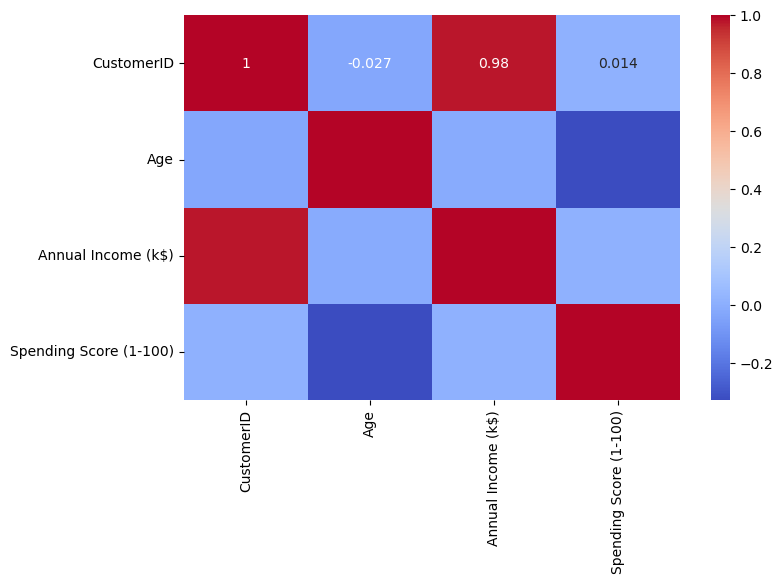

In [16]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

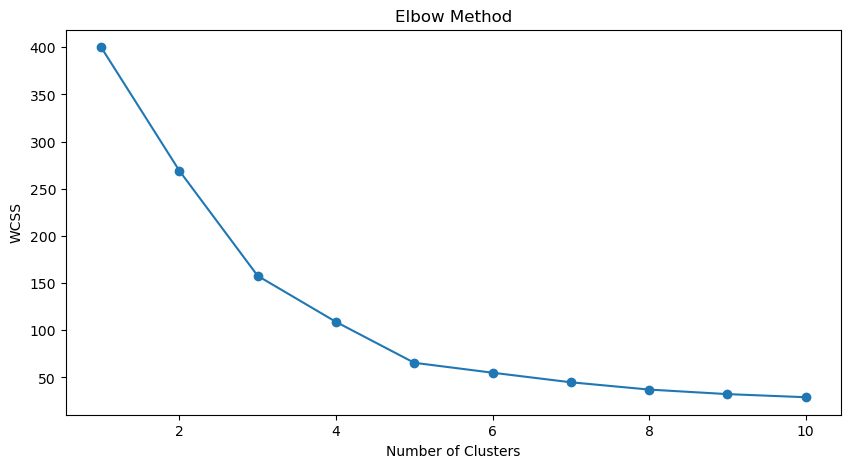

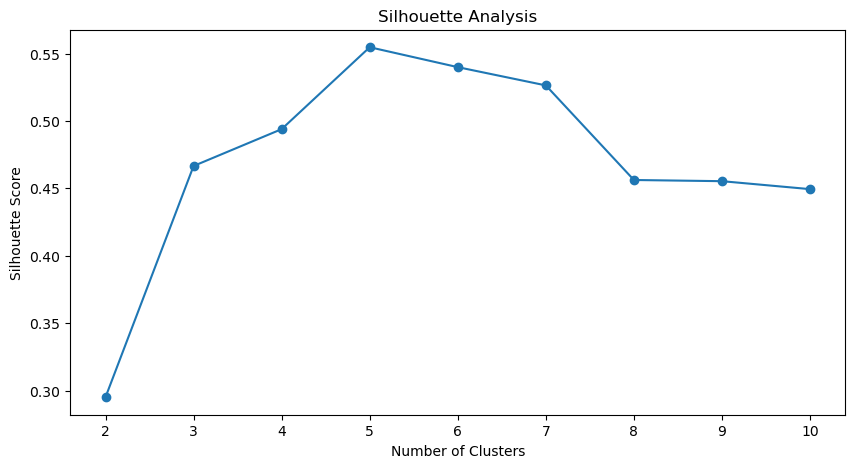

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Analysis
from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [35]:
# Apply KMeans with k=3 and k=5
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

clusters_3 = kmeans_3.fit_predict(X_scaled_df)
clusters_5 = kmeans_5.fit_predict(X_scaled_df)

# Add cluster labels to the original data
data['Cluster_3'] = clusters_3
data['Cluster_5'] = clusters_5


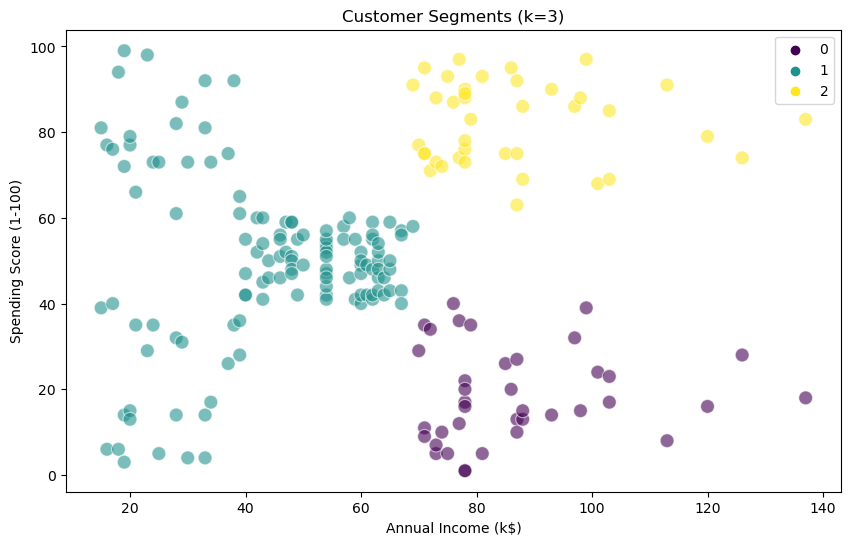

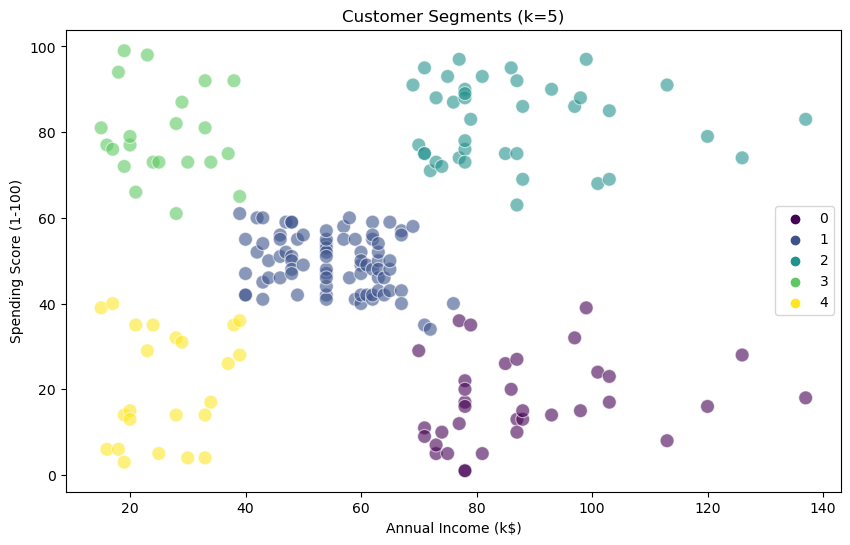

In [36]:
# Visualizing the clusters for k=3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_3', palette='viridis', data=data, s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Visualizing the clusters for k=5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_5', palette='viridis', data=data, s=100, alpha=0.6, edgecolor='w')
plt.title('Customer Segments (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [38]:
# Select only numeric columns for clustering summary
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Summary statistics for each cluster (k=3)
cluster_summary_3 = data.groupby('Cluster_3')[numeric_cols].mean()
print(cluster_summary_3)

# Summary statistics for each cluster (k=5)
cluster_summary_5 = data.groupby('Cluster_5')[numeric_cols].mean()
print(cluster_summary_5)

           CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster_3                                                                      
0               162.0  40.394737           87.000000               18.631579   
1                62.0  40.325203           44.154472               49.829268   
2               162.0  32.692308           86.538462               82.128205   

           Cluster_3  Cluster_5   Cluster  
Cluster_3                                  
0                0.0   0.078947  0.078947  
1                1.0   1.918699  1.918699  
2                2.0   2.000000  2.000000  
           CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster_5                                                                      
0          164.371429  41.114286           88.200000               17.114286   
1           86.320988  42.716049           55.296296               49.518519   
2          162.000000  32.692308           86.538462       